In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
match


In [ ]:
match.head()

In [ ]:
match.shape

In [ ]:

delivery.head()

In [ ]:
total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()

In [ ]:
total_score_df

In [ ]:
match_df=match.merge(total_score_df[["match_id","total_runs"]],left_on="id",right_on="match_id")

In [ ]:
match_df

In [ ]:
match_df["team1"].unique()

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df

In [ ]:
match_df.shape


In [ ]:
match_df["dl_applied"].value_counts()

In [ ]:
match_df=match_df[match_df["dl_applied"]==0]

In [ ]:
match_df

In [ ]:
match_df=match_df[["match_id","city","winner","total_runs"]]

In [ ]:
delivery_df=match_df.merge(delivery,on="match_id")

In [ ]:
delivery_df=delivery_df[delivery_df["inning"]==2]

In [ ]:
delivery_df

In [ ]:
# Convert 'total_runs_y' to a numeric type (if it's not already)
delivery_df["total_runs_y"] = pd.to_numeric(delivery_df["total_runs_y"], errors='coerce')

# Now apply the cumulative sum
delivery_df["current_score"] = delivery_df.groupby("match_id")["total_runs_y"].cumsum()


In [ ]:

delivery_df['current_score']

In [ ]:
delivery_df["runs_left"]=delivery_df["total_runs_x"]-delivery_df["current_score"]

In [ ]:
delivery_df["balls_left"]=126-(delivery_df["over"]*6+delivery_df["ball"])

In [ ]:
delivery_df

In [ ]:
# Fill missing values in 'player_dismissed' with "0" and ensure it's numeric
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1)

# Convert 'player_dismissed' to an integer type
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# Apply cumulative sum grouped by 'match_id'
delivery_df['wickets_lost'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Subtract cumulative dismissals from 10 to get remaining wickets
delivery_df['wickets'] = 10 - delivery_df['wickets_lost']

# Check the result
delivery_df.head()


In [ ]:
delivery_df.head()

In [ ]:
delivery_df.tail()

In [ ]:
#crr runs/over

delivery_df["crr"]=(delivery_df["current_score"]*6)/(120-delivery_df["balls_left"])

In [ ]:
delivery_df["rrr"]=(delivery_df["runs_left"]*6)/delivery_df["balls_left"]

In [ ]:
delivery_df["rrr"]

In [93]:
def result(row):
    return 1 if row["batting_team"]==row["winner"] else 0
    

In [94]:
delivery_df["result"]=delivery_df.apply(result,axis=1)

In [96]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [99]:
final_df


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
303165,Chennai Super Kings,Mumbai Indians,Hyderabad,-152,4,-2,157,15.982759,-228.000000,0
303166,Chennai Super Kings,Mumbai Indians,Hyderabad,-154,3,-2,157,15.948718,-308.000000,0
303167,Chennai Super Kings,Mumbai Indians,Hyderabad,-155,2,-3,157,15.864407,-465.000000,0
303168,Chennai Super Kings,Mumbai Indians,Hyderabad,-157,1,-3,157,15.831933,-942.000000,0


In [101]:
 final_df=final_df.sample(final_df.shape[0])

In [103]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
58067,Royal Challengers Bangalore,Kolkata Knight Riders,Centurion,111,67,9,173,7.018868,9.940299,1
23063,Kolkata Knight Riders,Rajasthan Royals,Jaipur,-105,45,-3,151,20.480000,-14.000000,0
269013,Sunrisers Hyderabad,Royal Challengers Bangalore,Bengaluru,-93,57,5,209,28.761905,-9.789474,0
67379,Deccan Chargers,Kolkata Knight Riders,Mumbai,62,54,9,161,9.000000,6.888889,0
197402,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,-55,79,7,161,31.609756,-4.177215,1
...,...,...,...,...,...,...,...,...,...,...
9983,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,133,115,9,138,6.000000,6.939130,0
210183,Chennai Super Kings,Mumbai Indians,Mumbai,51,53,8,183,11.820896,5.773585,1
5297,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,-81,40,-5,154,17.625000,-12.150000,0
175941,Royal Challengers Bangalore,Delhi Daredevils,Sharjah,67,55,8,145,7.200000,7.309091,1


In [106]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
70569,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,-64,80,8,204,40.2,-4.8,1


In [107]:
final_df=final_df[final_df["balls_left"]!=0]

In [109]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [110]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
4338,Kings XI Punjab,Delhi Daredevils,Delhi,-128,13,-5,137,14.859813,-59.076923
253602,Rajasthan Royals,Chennai Super Kings,Pune,-4,116,0,148,228.000000,-0.206897
193479,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,-76,60,0,170,24.600000,-7.600000
209669,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,70,66,10,127,6.333333,6.363636
168944,Rajasthan Royals,Chennai Super Kings,Jaipur,117,84,7,141,4.000000,8.357143
...,...,...,...,...,...,...,...,...,...
113705,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,171,70,6,232,7.320000,14.657143
158521,Chennai Super Kings,Sunrisers Hyderabad,Chennai,27,13,6,159,7.401869,12.461538
228385,Kolkata Knight Riders,Rajasthan Royals,Mumbai,-2,118,1,190,576.000000,-0.101695
198396,Mumbai Indians,Kings XI Punjab,Chandigarh,-116,39,5,159,20.370370,-17.846154


In [112]:
y_train

4338      0
253602    0
193479    0
209669    1
168944    1
         ..
113705    0
158521    1
228385    0
198396    1
173683    0
Name: result, Length: 117059, dtype: int64

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('trf', OneHotEncoder(drop='first', sparse_output=False), ['batting_team', 'bowling_team', 'city'])
        ],
        remainder='passthrough'
    )),
    ('classifier', LogisticRegression(solver='liblinear'))
])


In [117]:

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [118]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [137]:

y_pred = pipe.predict(X_test)

In [139]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8151375363061678

In [143]:

pipe.predict_proba(X_test)[10]


array([0.58174964, 0.41825036])

In [145]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [147]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    


In [149]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
20790,1,4,0,48.2,51.8
20798,2,8,0,43.0,57.0
20804,3,1,0,42.2,57.8
20810,4,7,1,57.1,42.9
20816,5,12,0,49.2,50.8
20822,6,13,0,40.8,59.2
20828,7,9,0,35.2,64.8
20836,8,15,0,26.8,73.2
20842,9,7,0,23.3,76.7
20849,10,17,0,16.3,83.7


Text(0.5, 1.0, 'Target-178')

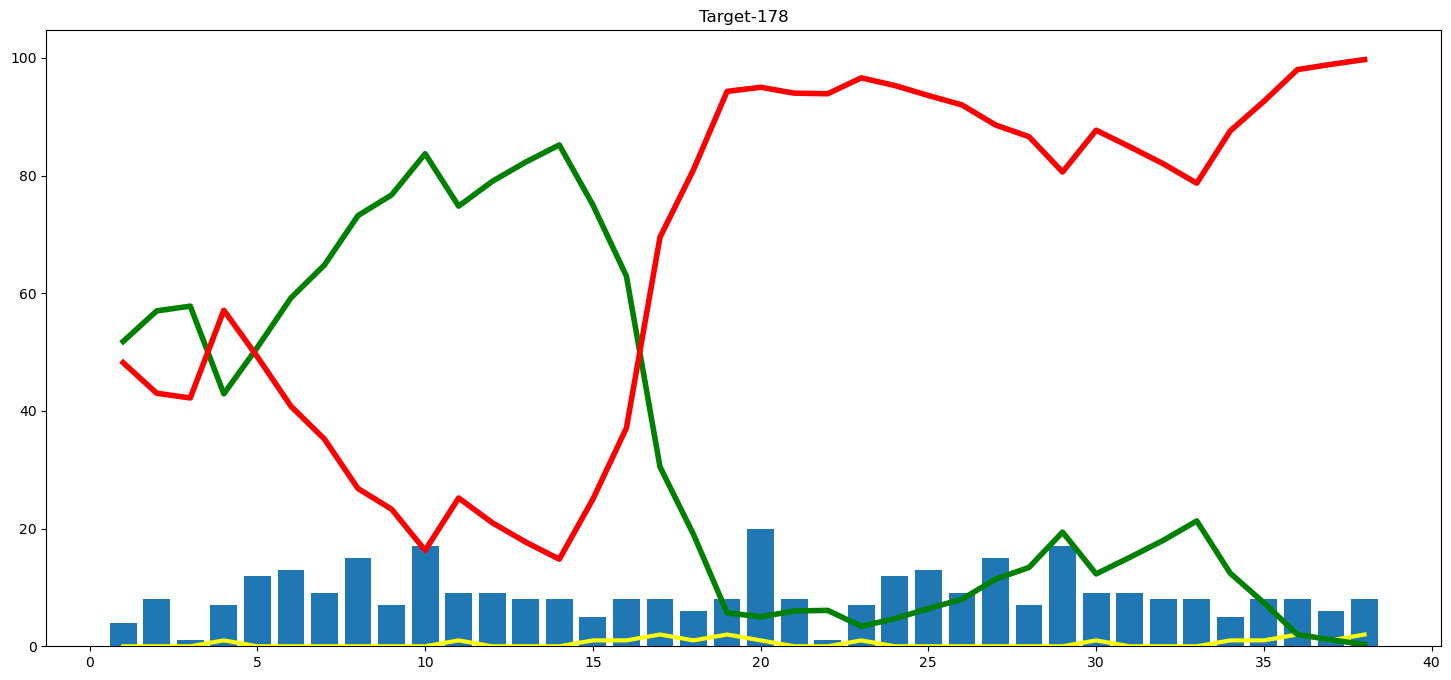

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [153]:

teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [155]:

delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
import streamlit as st
import pickle
import pandas as pd

teams = ['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru']

pipe = pickle.load(open('pipe.pkl','rb'))
st.title('IPL Win Predictor')

col1, col2 = st.beta_columns(2)

with col1:
    batting_team = st.selectbox('Select the batting team',sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team',sorted(teams))

selected_city = st.selectbox('Select host city',sorted(cities))

target = st.number_input('Target')

col3,col4,col5 = st.beta_columns(3)

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('Wickets out')

if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs*6)
    wickets = 10 - wickets
    crr = score/overs
    rrr = (runs_left*6)/balls_left

    input_df = pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],'city':[selected_city],'runs_left':[runs_left],'balls_left':[balls_left],'wickets':[wickets],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]})

    result = pipe.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]
    st.header(batting_team + "- " + str(round(win*100)) + "%")
    st.header(bowling_team + "- " + str(round(loss*100)) + "%")